In [1]:
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt
from mxnet import autograd, nd
import random

In [2]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [3]:
features[0], labels[0]

(
 [1.1630785 0.4838046]
 <NDArray 2 @cpu(0)>,
 
 [4.879625]
 <NDArray 1 @cpu(0)>)

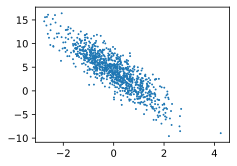

In [4]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

    
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1)

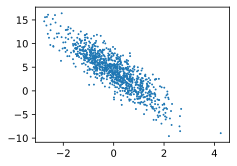

In [5]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

    
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);  # 加分号只显示图

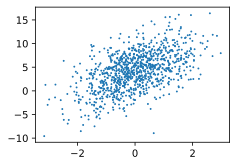

In [6]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

    
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
plt.scatter(features[:, 0].asnumpy(), labels.asnumpy(), 1);  # 加分号只显示图

In [7]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)  # take函数根据索引返回对应元素

In [8]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[ 1.0384175  -1.7305615 ]
 [ 0.44746986 -0.49543688]
 [ 1.3159044   0.18351008]
 [-1.5869852  -0.47912028]
 [-0.10537732 -1.5065718 ]
 [-2.7653847  -0.7842745 ]
 [ 0.347244    0.6383554 ]
 [-0.29296082 -0.30558026]
 [ 0.38932386  1.0532603 ]
 [-0.30739015 -1.126209  ]]
<NDArray 10x2 @cpu(0)> 
[12.161496   6.7833433  6.2105885  2.646202   9.1038685  1.3224878
  2.7228804  4.6608973  1.3917404  7.415735 ]
<NDArray 10 @cpu(0)>


In [9]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

In [10]:
# 为梯度申请内存
w.attach_grad()
b.attach_grad()

In [11]:
def linreg(X, w, b):
    return nd.dot(X, w) + b

In [12]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [13]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [14]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.034978
epoch 2, loss 0.000120
epoch 3, loss 0.000049


In [15]:
true_w, w

([2, -3.4],
 
 [[ 1.9994053]
  [-3.3997903]]
 <NDArray 2x1 @cpu(0)>)

In [16]:
true_b, b

(4.2,
 
 [4.199815]
 <NDArray 1 @cpu(0)>)